# This notebook is recipe of Khacapuri 🇬🇪 using Stoyan Stoyan buch.
## 1. Poisson Point Field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

5
[[0.11169314 0.58596187]
 [0.52516807 0.06062897]
 [0.54467602 0.82635905]
 [0.97678428 0.66315417]
 [0.30669635 0.18317052]]


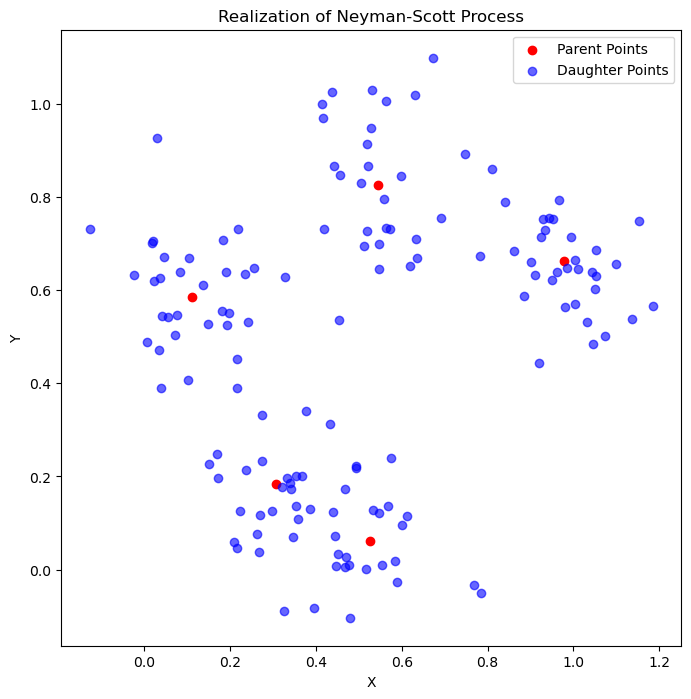

In [2]:
# Step 1: Define parameters for the Neyman-Scott process
lambda_parent = 10  # intensity of the parent Poisson process
lambda_daughter = 30  # mean number of daughter points per parent point
sigma = 0.1  # standard deviation of normal distribution for daughter points

# Step 2: Simulate the parent Poisson process
num_parents = np.random.poisson(lambda_parent) # Poisson number of parent points
parent_points = np.random.uniform(0, 1, (num_parents, 2)) # Uniformly distributed parent points
print(num_parents)
print(parent_points)

# Step 3: Simulate the daughter points
daughter_points = []
for parent in parent_points:
    num_daughters = np.random.poisson(lambda_daughter) # Poisson number of daughter points
    daughters = parent + sigma * np.random.randn(num_daughters, 2) #Add Gaussian noise to parent point
    daughter_points.append(daughters)

# Flatten the list of daughter points
daughter_points = np.vstack(daughter_points)

# Step 4: Plot the Neyman-Scott field
plt.figure(figsize=(8, 8))
plt.scatter(parent_points[:, 0], parent_points[:, 1], c='red', label='Parent Points')
plt.scatter(daughter_points[:, 0], daughter_points[:, 1], c='blue', label='Daughter Points', alpha=0.6)
plt.legend()
plt.title('Realization of Neyman-Scott Process')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

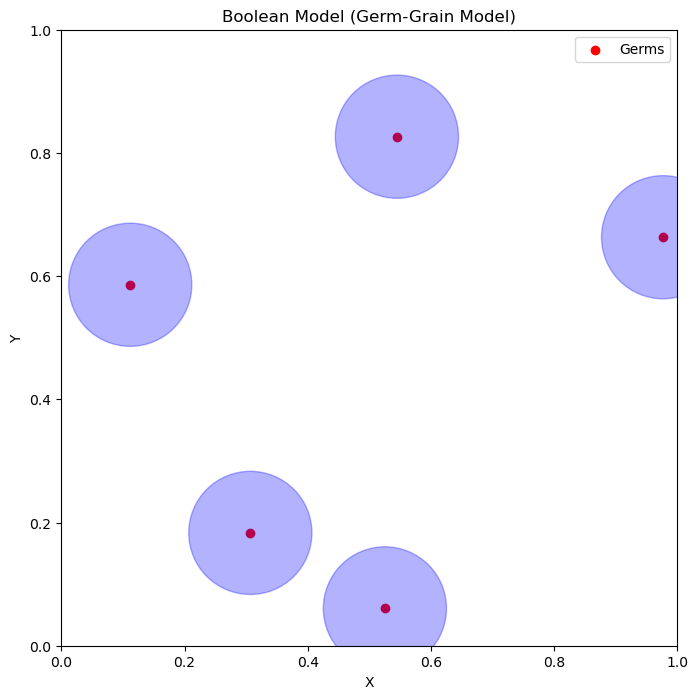

In [3]:
# Visualize the Boolean model using germ and grain

# Define the radius of the grains
grain_radius = 0.1

# Create a figure
plt.figure(figsize=(8, 8))

# Plot the parent points (germs)
plt.scatter(parent_points[:, 0], parent_points[:, 1], c='red', label='Germs')

# Plot the grains (circles) around each parent point
for parent in parent_points:
    circle = plt.Circle(parent, grain_radius, color='blue', alpha=0.3)
    plt.gca().add_patch(circle)

# Set plot properties
plt.legend()
plt.title('Boolean Model (Germ-Grain Model)')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

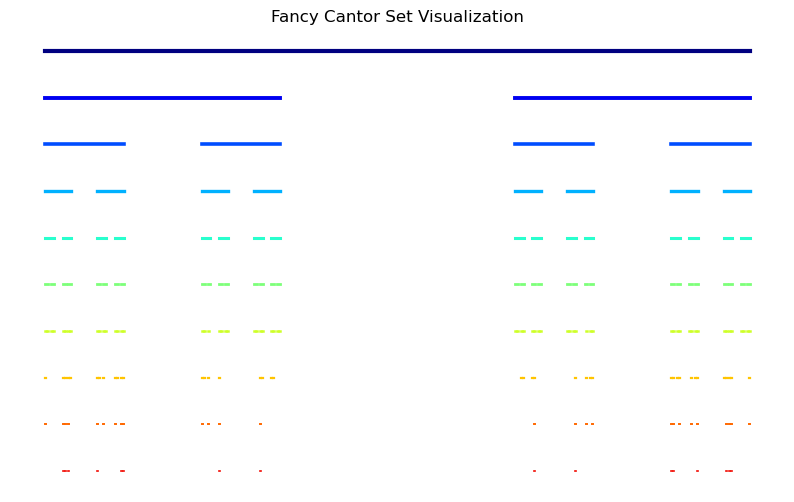

In [4]:
def cantor_not_borel(x, y, depth, level=0):
    """Recursively compute and plot intervals for a fancy Cantor set visualization."""
    if depth == 0:
        return
    else:
        # Define color gradient and line thickness based on level
        color = plt.cm.jet(level / max_depth)
        thickness = 3 - (level / max_depth) * 2  # Thicker at top levels

        # Plot current level interval
        plt.plot([x, y], [level, level], color=color, linewidth=thickness)

        # Recur for the first and last thirds
        cantor_not_borel(x, x + (y - x) / 3, depth - 1, level + 1)
        cantor_not_borel(y - (y - x) / 3, y, depth - 1, level + 1)

# Parameters for the visualization
max_depth = 10
plt.figure(figsize=(10, 6))
plt.title("Fancy Cantor Set Visualization")
plt.axis("off")

# Start the recursive drawing
cantor_not_borel(0, 1, max_depth)

# Show plot
plt.gca().invert_yaxis()  # Invert Y-axis for a top-down view
plt.show()

In [5]:
# Redefine the recursive Cantor function
def cantor_not_borel_v2(x, y, depth, level=0, max_depth=10, ax=None, lines=[]):
    """Recursively compute intervals for Cantor set visualization with animated levels."""
    if depth == 0:
        return
    else:
        # Define color and line thickness based on recursion level
        thickness = 3 - (level / max_depth) * 2  # Thicker at top levels
        color = plt.cm.jet(level / max_depth)
        # Plot current level interval
        line, = ax.plot([x, y], [level, level], color=color, linewidth=thickness)
        lines.append(line)
        
        # Recurse for left and right intervals
        cantor_not_borel_v2(x, x + (y - x) / 3, depth - 1, level + 1, max_depth, ax, lines)
        cantor_not_borel_v2(y - (y - x) / 3, y, depth - 1, level + 1, max_depth, ax, lines)
    
    return lines


In [6]:
# Initialize the list to hold line objects across frames
lines = []

# Animation update function
def update(depth):
    # Clear previous lines for each new depth
    ax.clear()
    ax.set_title("Animated Fancy Cantor Set Visualization")
    ax.axis("off")
    ax.invert_yaxis()

    # Draw Cantor set up to the current depth
    lines.clear()  # Reset lines for each frame
    cantor_not_borel_v2(0, 1, depth, 0, max_depth, ax, lines)
    return lines

# Set up the figure for animation
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Animated Fancy Cantor Set Visualization")
ax.axis("off")
ax.invert_yaxis()  # Top-down view

# Generate animation with FuncAnimation
ani = animation.FuncAnimation(fig, update, frames=range(1, max_depth + 1), blit=True, interval=500, repeat_delay=1000)
plt.close(fig)  # Close static display
ani

In [7]:
ani.save('cantor_set_animation.gif', writer='imagemagick', fps=1)  # Save animation as GIF  # Save animation as GIF

In [8]:
# Recursive function to draw Sierpiński carpet at a given level of depth
def sierpinski_carpet(x, y, size, depth, max_depth):
    if depth == 0:
        # Draw a filled square for the base case
        square = plt.Rectangle((x, y), size, size, facecolor="black")
        ax.add_patch(square)
    else:
        # Calculate the size of the smaller squares
        new_size = size / 3
        # Loop to place smaller squares in the grid, skipping the center
        for dx in range(3):
            for dy in range(3):
                if dx == 1 and dy == 1:
                    continue  # Skip the center square
                # Recur for the 8 smaller squares around the center
                sierpinski_carpet(x + dx * new_size, y + dy * new_size, new_size, depth - 1, max_depth)

In [9]:
# Animation update function
def update(depth):
    ax.clear()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    sierpinski_carpet(0, 0, 1, depth, max_depth)

In [10]:
# Set up figure for animation
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.axis('off')

# Set maximum depth of recursion for animation
max_depth = 5

# Create animation
ani = animation.FuncAnimation(fig, update, frames=range(1, max_depth + 1), interval=800, repeat_delay=1000)
plt.close(fig)  # Close static display
ani

In [11]:
ani.save('sierpinski_carpet_animation.gif', writer='imagemagick', fps=1)  # Save animation as GIF

In [12]:
def get_color(depth, max_depth):
    # Normalize depth for RGB values
    ratio = depth / max_depth
    return (1.0 - ratio, 0.0, ratio)  # Transition from red to blue

In [13]:
# Recursive function to draw Sierpiński carpet at a given level of depth
def sierpinski_carpet_RGB(x, y, size, depth, max_depth):
    if depth == 0:
        # Draw a filled square for the base case
        square_color = get_color(depth, max_depth)
        square = plt.Rectangle((x, y), size, size, facecolor=square_color)
        ax.add_patch(square)
    else:
        # Calculate the size of the smaller squares
        new_size = size / 3
        # Loop to place smaller squares in the grid, skipping the center
        for dx in range(3):
            for dy in range(3):
                if dx == 1 and dy == 1:
                    continue  # Skip the center square
                # Recur for the 8 smaller squares around the center
                sierpinski_carpet_RGB(x + dx * new_size, y + dy * new_size, new_size, depth - 1, max_depth)

In [14]:
# Animation update function
def update(depth):
    ax.clear()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    sierpinski_carpet_RGB(0, 0, 1, depth, max_depth)

In [15]:
# Set up figure for animation
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.axis('off')

# Set maximum depth of recursion for animation
max_depth = 5

# Create animation
ani = animation.FuncAnimation(fig, update, frames=range(1, max_depth + 1), interval=800, repeat_delay=1000)
plt.close(fig)  # Close static display
ani

In [16]:
ani.save('sierpinski_carpet_RGB_animation.gif', writer='imagemagick', fps=1)  # Save animation as GIF

In [17]:
# Function to generate chill colors based on depth using a softer colormap
def get_chill_color(depth, max_depth):
    color_map = plt.cm.viridis  # Change this to a greenish colormap 
    color = color_map(depth / max_depth)  # Get color based on depth
    return color  # Return RGBA color

# Recursive function to draw Sierpiński carpet at a given level of depth
def sierpinski_carpet_chill(x, y, size, depth, max_depth, squares):
    if depth == 0:
        # Draw a filled square for the base case
        square_color = get_chill_color(depth, max_depth)  # Base case color
        square = plt.Rectangle((x, y), size, size, facecolor=square_color)
        ax.add_patch(square)
        squares.append(square)
    else:
        # Calculate the size of the smaller squares
        new_size = size / 3
        # Loop to place smaller squares in the grid, skipping the center
        for dx in range(3):
            for dy in range(3):
                if dx == 1 and dy == 1:
                    continue  # Skip the center square
                # Recur for the 8 smaller squares around the center
                sierpinski_carpet_chill(x + dx * new_size, y + dy * new_size, new_size, depth - 1, max_depth, squares)

# Animation update function
def update(depth):
    ax.clear()  # Clear previous squares
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    squares.clear()  # Clear the list of squares
    # Draw the Sierpiński carpet at the current depth
    sierpinski_carpet_chill(0, 0, 1, depth, max_depth, squares)
    # Update the colors of the squares
    for square in squares:
        square.set_facecolor(get_chill_color(depth, max_depth))

In [18]:
fig, ax = plt.subplots()
max_depth = 5
squares = []
ani = animation.FuncAnimation(fig, update, frames=range(max_depth + 1), interval=800, repeat_delay=1000)
ani.save('sierpinski_carpet_chill_animation.gif', writer='imagemagick', fps=1)
plt.close(fig)  
